In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Проведение разведочного анализа данных (EDA)

In [4]:
all_events = pd.read_csv('all_events.csv')
train_events = pd.read_csv('train_events.csv')
train_targets = pd.read_csv('train_targets.csv')
video_info = pd.read_csv('video_info_v2.csv')

In [7]:
# Проверка на пропущенные значения и размеры датасетов
print("All Events missing values:\n", all_events.isnull().sum())
print("Train Events missing values:\n", train_events.isnull().sum())
print("Train Targets missing values:\n", train_targets.isnull().sum())
print("Video Info missing values:\n", video_info.isnull().sum())

All Events missing values:
 event_timestamp         0
region                  0
ua_device_type          0
ua_client_type         13
ua_os              519630
ua_client_name         13
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64
Train Events missing values:
 event_timestamp         0
region                  0
ua_device_type          0
ua_client_type          0
ua_os              117671
ua_client_name          0
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64
Train Targets missing values:
 viewer_uid    0
age           0
sex           0
age_class     0
dtype: int64
Video Info missing values:
 rutube_video_id    0
title              0
category           0
duration           0
author_id          0
dtype: int64


In [8]:
# Размеры таблиц
print("All Events shape: ", all_events.shape)
print("Train Events shape: ", train_events.shape)
print("Train Targets shape: ", train_targets.shape)
print("Video Info shape: ", video_info.shape)

All Events shape:  (8439624, 9)
Train Events shape:  (1759616, 9)
Train Targets shape:  (180012, 4)
Video Info shape:  (481480, 5)


In [9]:
# Информация о типах данных
print("All Events Data Types:")
print(all_events.dtypes, "\n")

print("Train Events Data Types:")
print(train_events.dtypes, "\n")

print("Train Targets Data Types:")
print(train_targets.dtypes, "\n")

print("Video Info Data Types:")
print(video_info.dtypes, "\n")

All Events Data Types:
event_timestamp    object
region             object
ua_device_type     object
ua_client_type     object
ua_os              object
ua_client_name     object
total_watchtime     int64
rutube_video_id    object
viewer_uid          int64
dtype: object 

Train Events Data Types:
event_timestamp    object
region             object
ua_device_type     object
ua_client_type     object
ua_os              object
ua_client_name     object
total_watchtime     int64
rutube_video_id    object
viewer_uid          int64
dtype: object 

Train Targets Data Types:
viewer_uid     int64
age            int64
sex           object
age_class      int64
dtype: object 

Video Info Data Types:
rutube_video_id    object
title              object
category           object
duration            int64
author_id           int64
dtype: object 



In [10]:
# Базовая статистика по числовым данным
print("All Events - Descriptive Statistics:")
print(all_events.describe(), "\n")

print("Train Events - Descriptive Statistics:")
print(train_events.describe(), "\n")

print("Train Targets - Descriptive Statistics:")
print(train_targets.describe(), "\n")

print("Video Info - Descriptive Statistics:")
print(video_info.describe(), "\n")

All Events - Descriptive Statistics:
       total_watchtime    viewer_uid
count     8.439624e+06  8.439624e+06
mean      1.770399e+03  1.058747e+07
std       4.356028e+04  3.079943e+05
min       3.100000e+01  1.000000e+07
25%       2.520000e+02  1.032427e+07
50%       1.223000e+03  1.058372e+07
75%       2.543000e+03  1.085021e+07
max       1.262387e+08  1.114090e+07 

Train Events - Descriptive Statistics:
       total_watchtime    viewer_uid
count     1.759616e+06  1.759616e+06
mean      2.203427e+03  1.022880e+07
std       4.027573e+03  2.693066e+05
min       3.100000e+01  1.000000e+07
25%       5.820000e+02  1.004566e+07
50%       1.859000e+03  1.010263e+07
75%       2.902000e+03  1.031212e+07
max       2.489070e+06  1.114089e+07 

Train Targets - Descriptive Statistics:
         viewer_uid            age      age_class
count  1.800120e+05  180012.000000  180012.000000
mean   1.029977e+07      33.907195       1.807663
std    3.021522e+05       9.025405       0.851527
min    1.00000

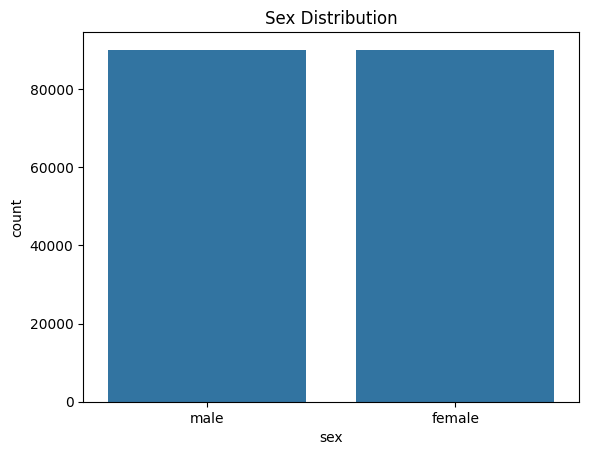

In [11]:
sns.countplot(x='sex', data=train_targets)
plt.title('Sex Distribution')
plt.show()

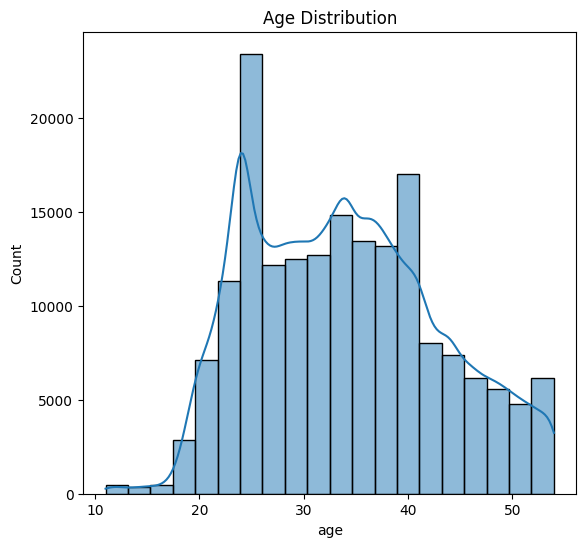

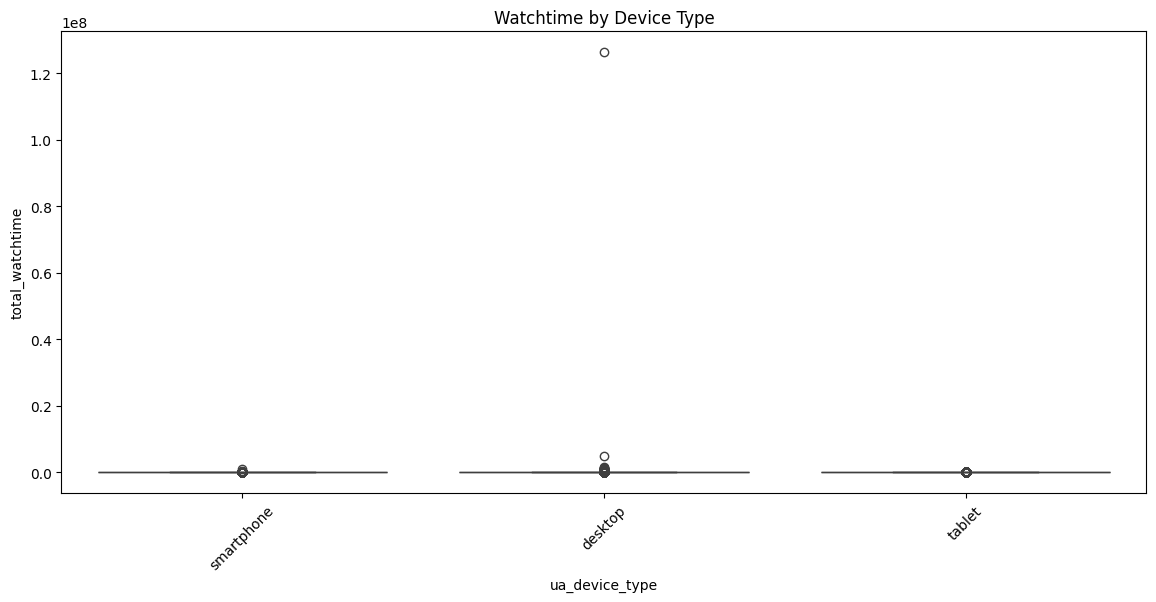

In [11]:
# Анализ распределения целевых переменных
plt.figure(figsize=(14, 6))

# Распределение возрастов
plt.subplot(1, 2, 1)
sns.histplot(train_targets['age'], kde=True, bins=20)
plt.title('Age Distribution')

# Анализ времени просмотра в зависимости от устройства
plt.figure(figsize=(14, 6))
sns.boxplot(x='ua_device_type', y='total_watchtime', data=all_events)
plt.title('Watchtime by Device Type')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Слияние данных для дальнейшего анализа
merged_data = pd.merge(train_events, train_targets, on='viewer_uid', how='inner')
merged_data = pd.merge(merged_data, video_info, on='rutube_video_id', how='left')

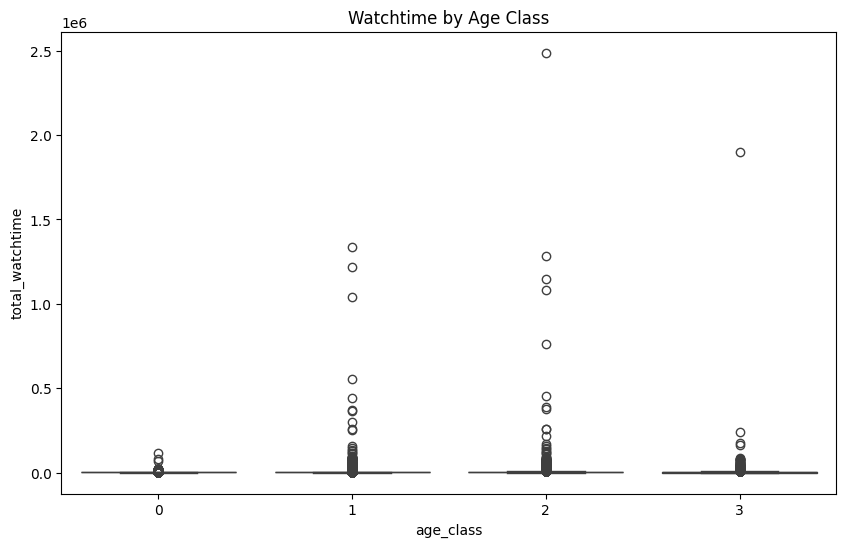

In [13]:
# Анализ распределения времени просмотра по возрасту
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_class', y='total_watchtime', data=merged_data)
plt.title('Watchtime by Age Class')
plt.show()

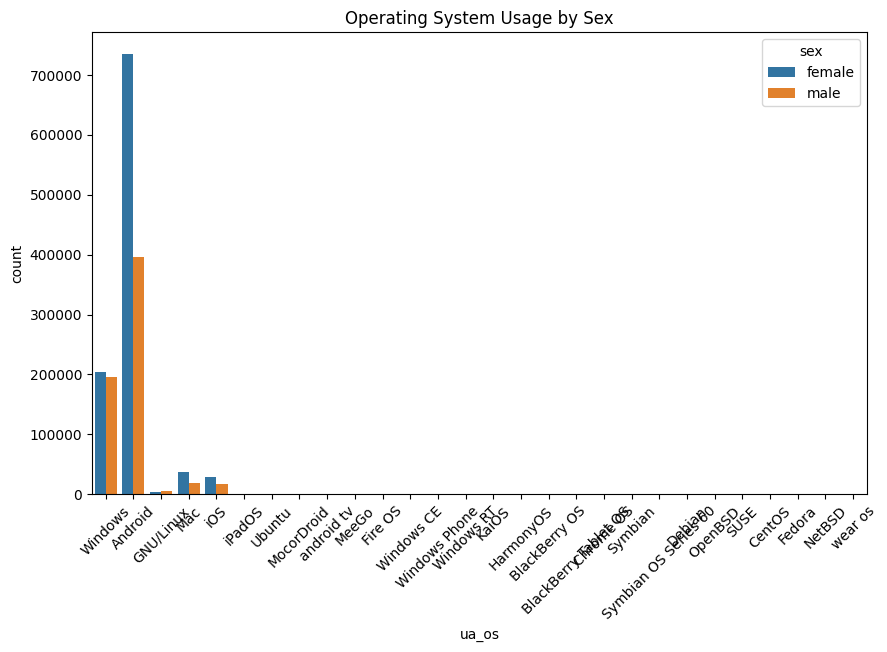

In [15]:
# Анализ операционных систем
plt.figure(figsize=(10, 6))
sns.countplot(x='ua_os', data=merged_data, hue='sex')
plt.title('Operating System Usage by Sex')
plt.xticks(rotation=45)
plt.show()

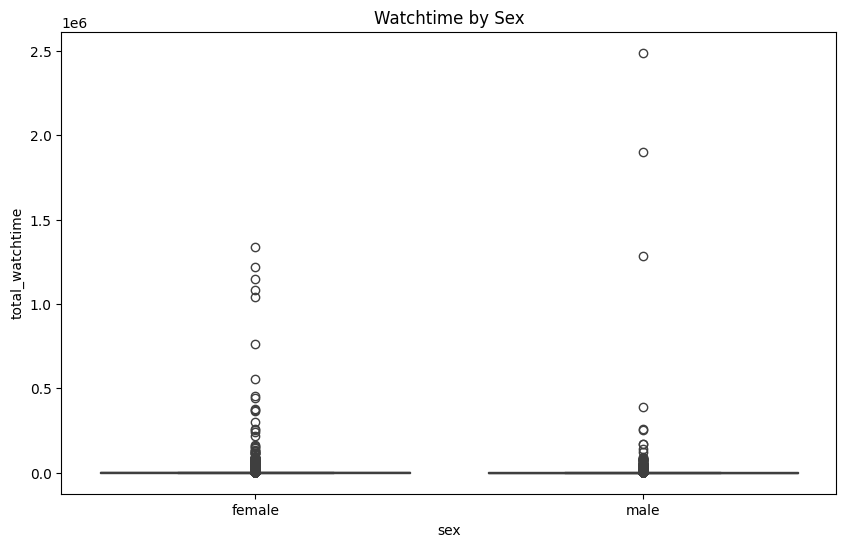

In [16]:
# Проверим распределение времени просмотра (total_watchtime) по полу
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='total_watchtime', data=merged_data)
plt.title('Watchtime by Sex')
plt.show()

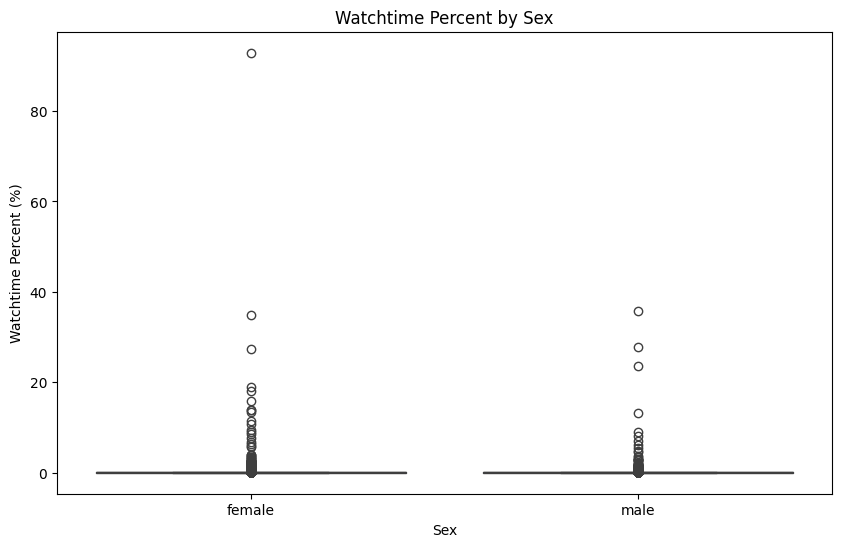

            count      mean       std       min       25%       50%       75%  \
sex                                                                             
female  1084515.0  0.068259  0.117313  0.000039  0.032738  0.077135  0.098941   
male     675101.0  0.064106  0.081423  0.000036  0.026193  0.066948  0.097882   

              max  
sex                
female  92.886165  
male    35.665138  


In [23]:
# Вычисление процента просмотренного видео (от общего времени видео)
merged_data['watchtime_percent'] = (merged_data['total_watchtime'] / merged_data['duration']) * 100

# Удаление некорректных данных: где длительность видео <= 0 или total_watchtime > duration
merged_data_clean = merged_data[(merged_data['duration'] > 0) & (merged_data['watchtime_percent'] <= 100)]

# Удаление пропущенных значений в столбцах 'sex' и 'watchtime_percent'
merged_data_clean = merged_data_clean.dropna(subset=['sex', 'watchtime_percent'])

# Построение boxplot для процента просмотренного видео по полу
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='watchtime_percent', data=merged_data_clean)
plt.title('Watchtime Percent by Sex')
plt.ylabel('Watchtime Percent (%)')
plt.xlabel('Sex')
plt.show()

# Вывод основных статистик для процента просмотренного видео по полу
print(merged_data_clean.groupby('sex')['watchtime_percent'].describe())


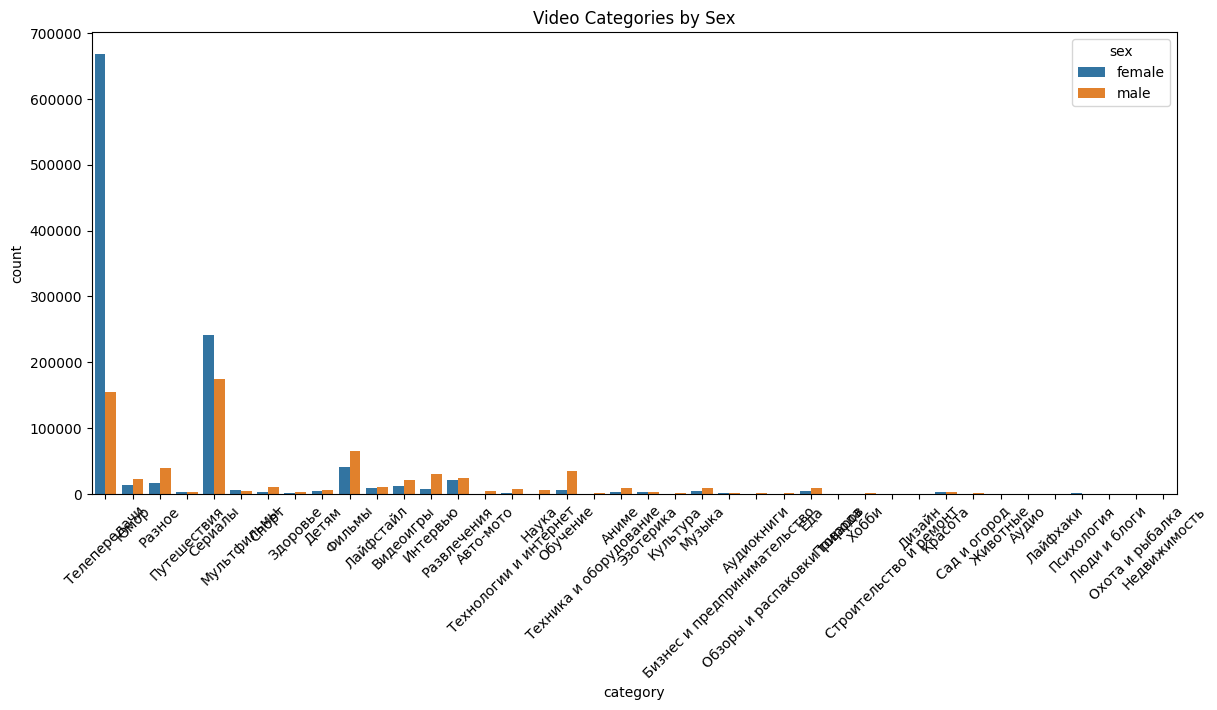

In [17]:
# Анализ категорий видео по полу
plt.figure(figsize=(14, 6))
sns.countplot(x='category', hue='sex', data=merged_data)
plt.title('Video Categories by Sex')
plt.xticks(rotation=45)
plt.show()

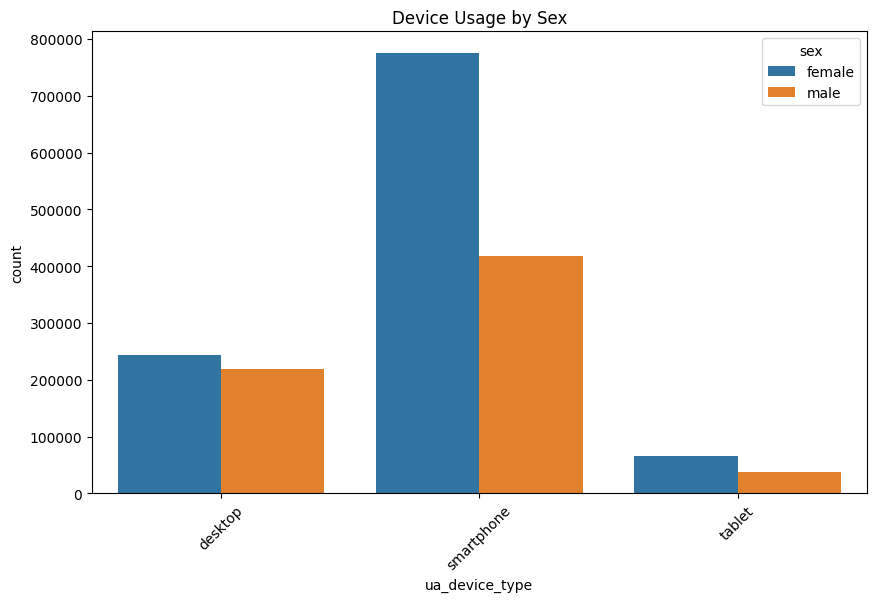

In [24]:
# Проверим, как различные устройства (ua_device_type) используются в зависимости от пола
plt.figure(figsize=(10, 6))
sns.countplot(x='ua_device_type', hue='sex', data=merged_data)
plt.title('Device Usage by Sex')
plt.xticks(rotation=45)
plt.show()

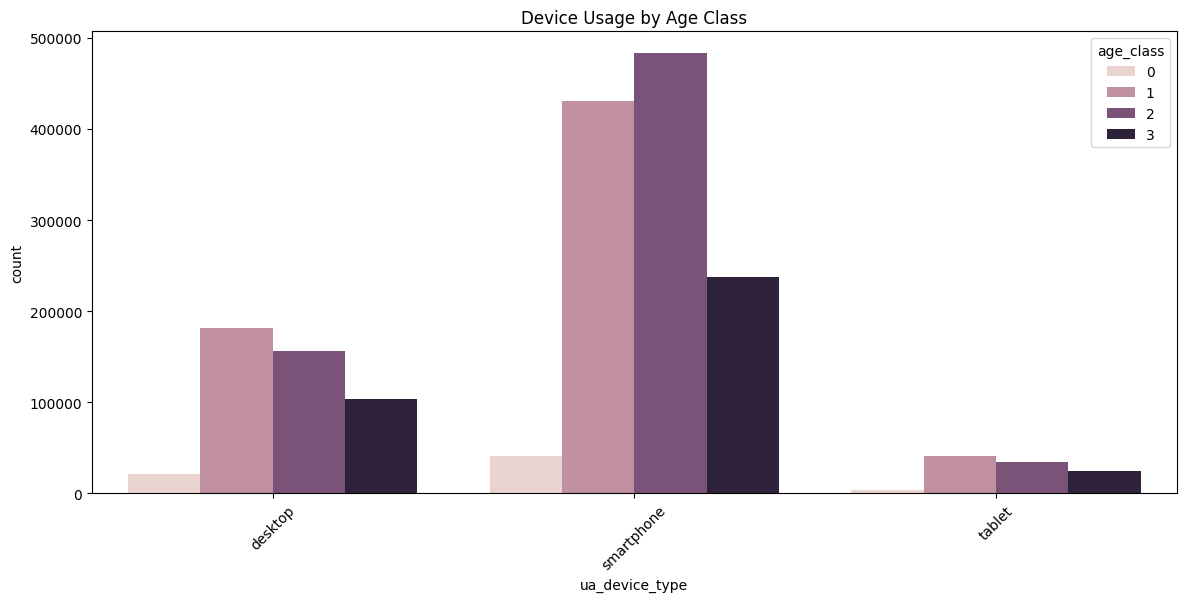

In [25]:
# Проверим распределение по возрастным категориям (age_class) для каждого устройства
plt.figure(figsize=(14, 6))
sns.countplot(x='ua_device_type', hue='age_class', data=merged_data)
plt.title('Device Usage by Age Class')
plt.xticks(rotation=45)
plt.show()

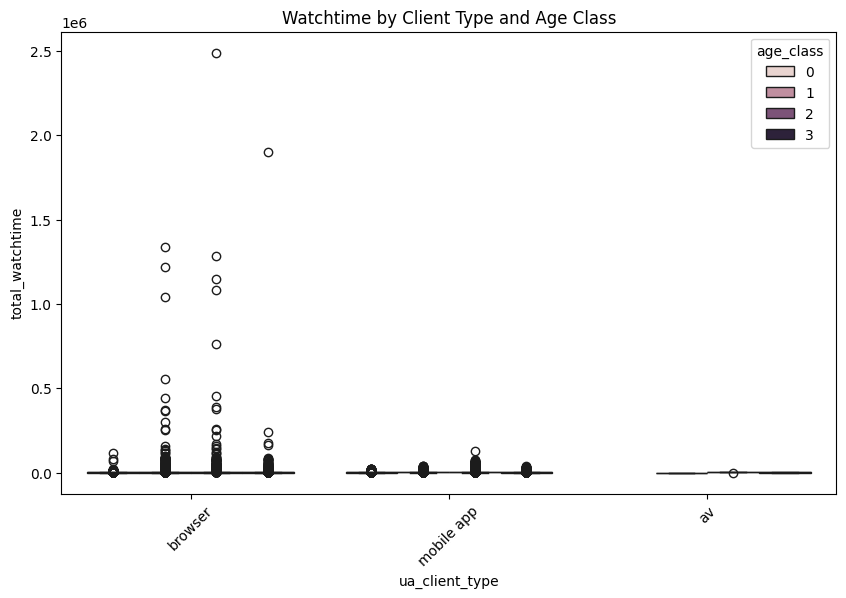

In [26]:
# Время просмотра (total_watchtime) в зависимости от типа клиента (браузер или приложение)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ua_client_type', y='total_watchtime', hue='age_class', data=merged_data)
plt.title('Watchtime by Client Type and Age Class')
plt.xticks(rotation=45)
plt.show()

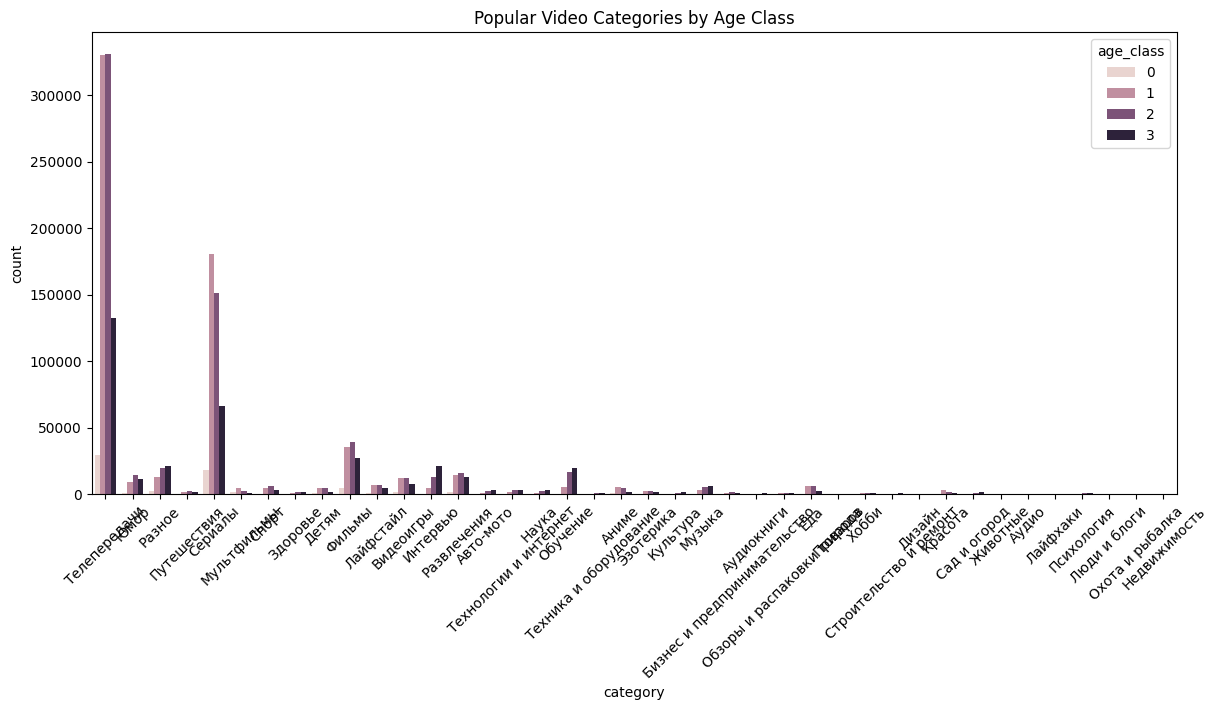

In [27]:
# Проанализируем, какие категории видео популярны у разных возрастных групп
plt.figure(figsize=(14, 6))
sns.countplot(x='category', hue='age_class', data=merged_data)
plt.title('Popular Video Categories by Age Class')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Проверим количество уникальных пользователей и событий
unique_users = all_events['viewer_uid'].nunique()
total_events = all_events.shape[0]
print(f'Количество уникальных пользователей: {unique_users}')
print(f'Общее количество событий: {total_events}')

Количество уникальных пользователей: 960885
Общее количество событий: 8439624


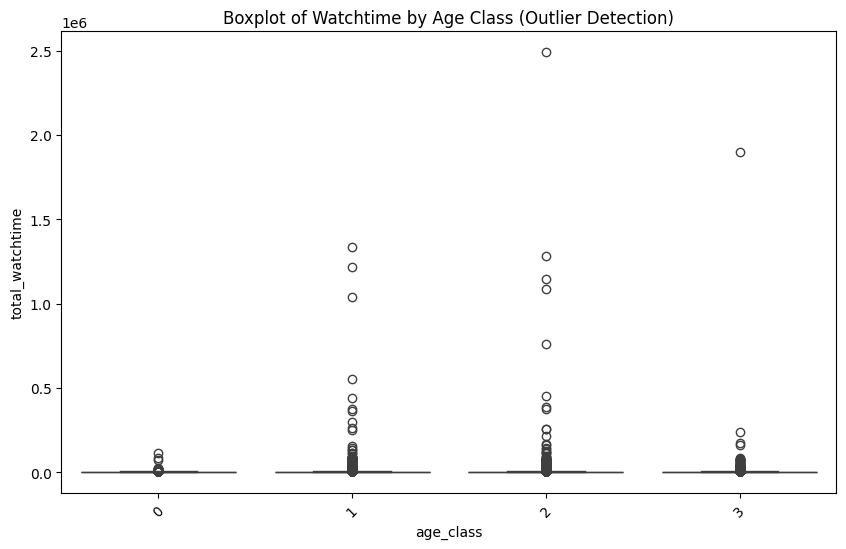

In [32]:
# Дополнительная проверка на выбросы в данных
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_class', y='total_watchtime', data=merged_data)
plt.title('Boxplot of Watchtime by Age Class (Outlier Detection)')
plt.xticks(rotation=45)
plt.show()

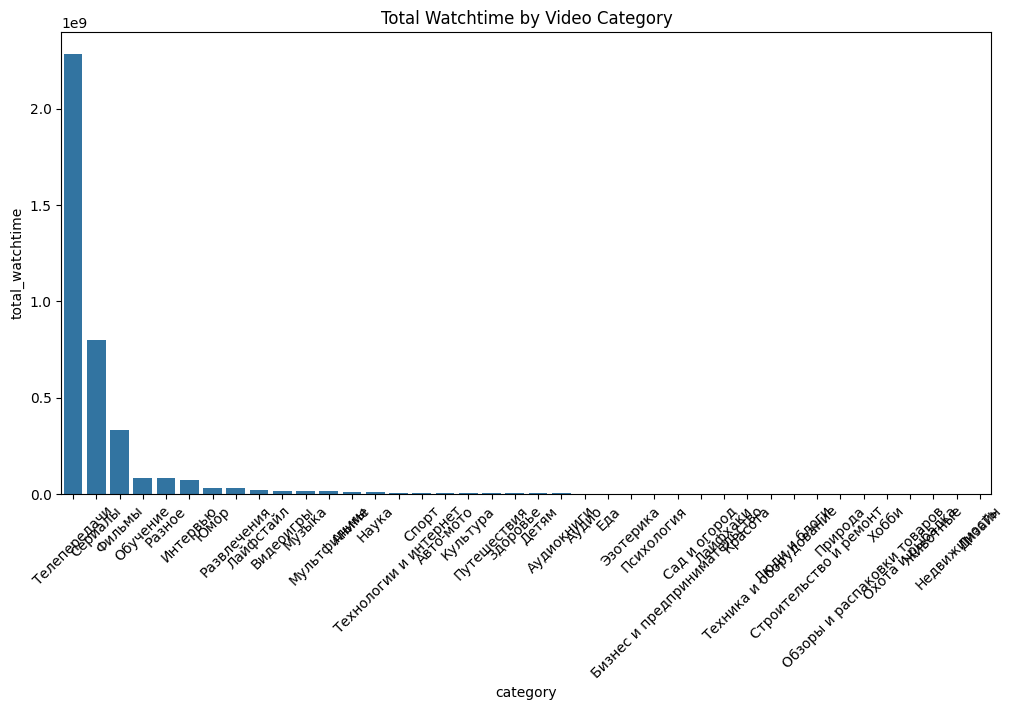

In [33]:
# Распределение популярности различных категорий видео по времени просмотра
category_watchtime = merged_data.groupby('category')['total_watchtime'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_watchtime', data=category_watchtime)
plt.title('Total Watchtime by Video Category')
plt.xticks(rotation=45)
plt.show()

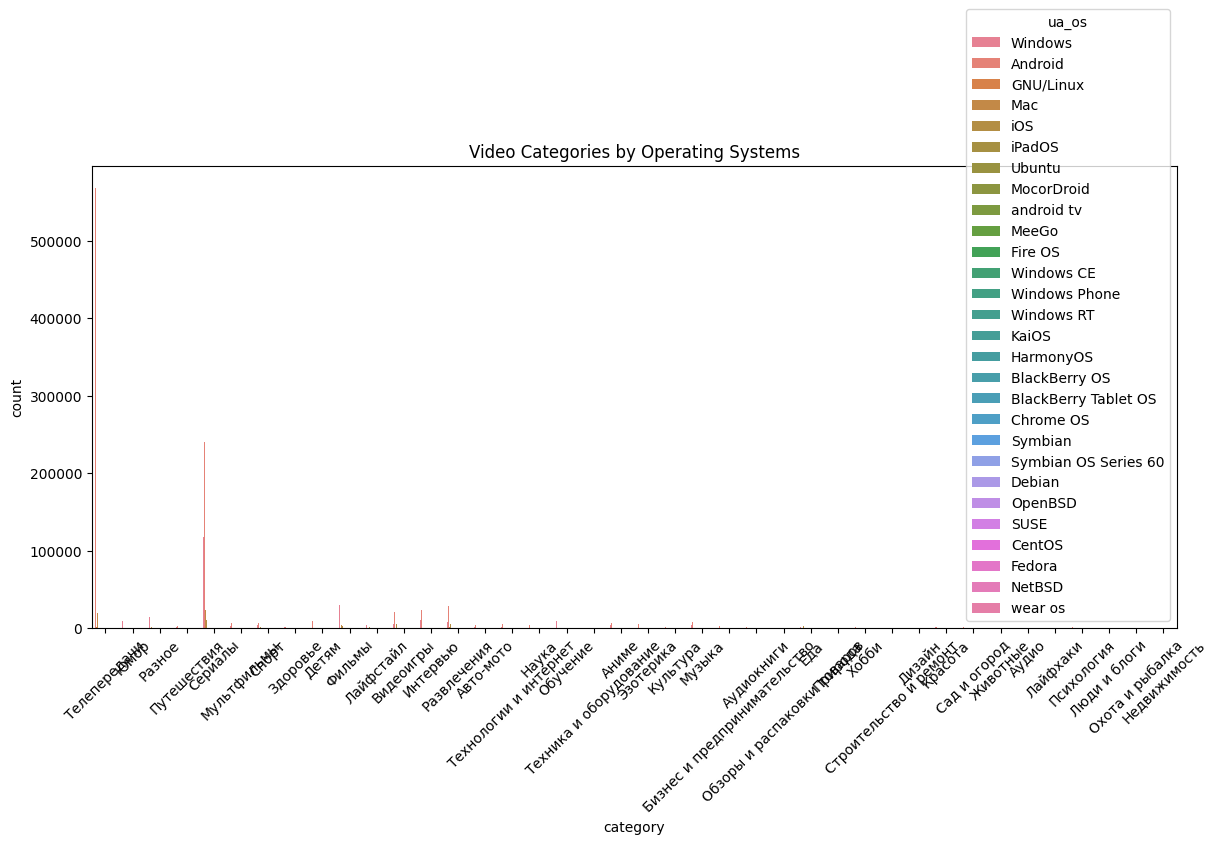

In [34]:
# Взаимосвязь категорий видео с операционными системами (ua_os)
plt.figure(figsize=(14, 6))
sns.countplot(x='category', hue='ua_os', data=merged_data)
plt.title('Video Categories by Operating Systems')
plt.xticks(rotation=45)
plt.show()

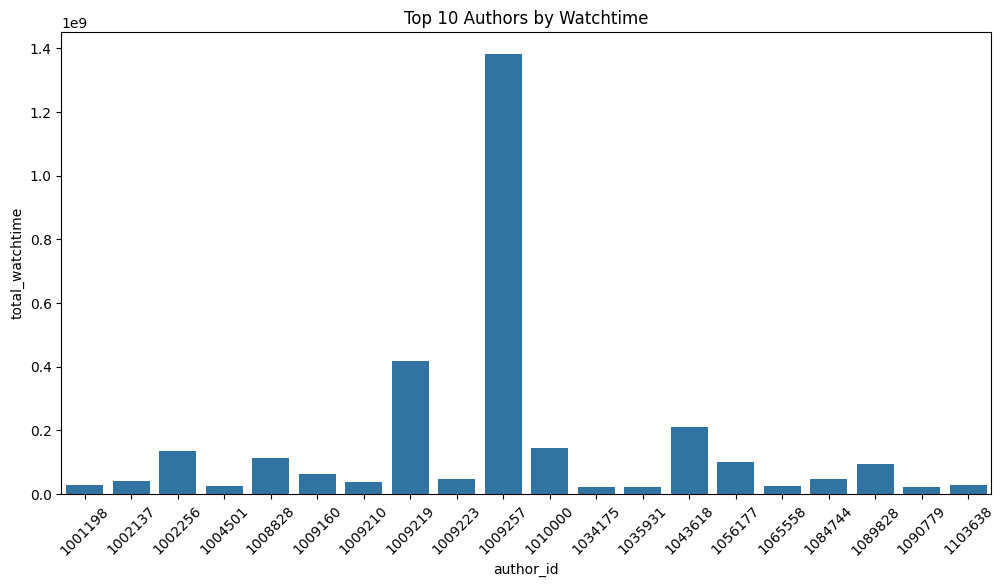

In [37]:
# Анализ топ авторов видео по времени просмотра
top_authors = merged_data.groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='author_id', y='total_watchtime', data=top_authors)
plt.title('Top 10 Authors by Watchtime')
plt.xticks(rotation=45)
plt.show()

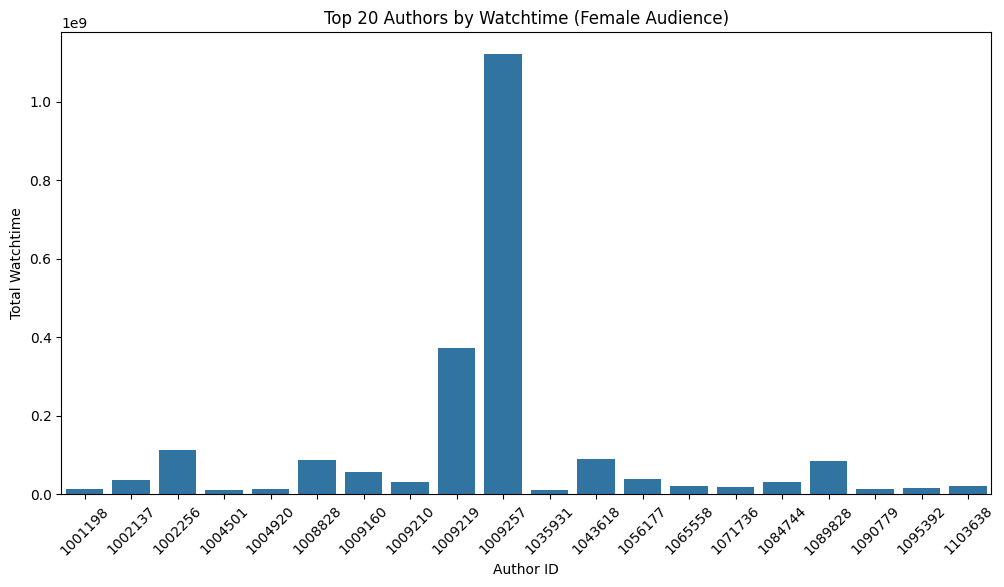

In [40]:
# Отфильтруем данные только по женскому полу ('female')
female_data = merged_data[merged_data['sex'] == 'female']

# Группировка данных по авторам и вычисление общего времени просмотра
top_female_authors = female_data.groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(20).reset_index()

# Построение графика для топ 20 авторов по времени просмотра у женщин
plt.figure(figsize=(12, 6))
sns.barplot(x='author_id', y='total_watchtime', data=top_female_authors)
plt.title('Top 20 Authors by Watchtime (Female Audience)')
plt.xticks(rotation=45)
plt.xlabel('Author ID')
plt.ylabel('Total Watchtime')
plt.show()

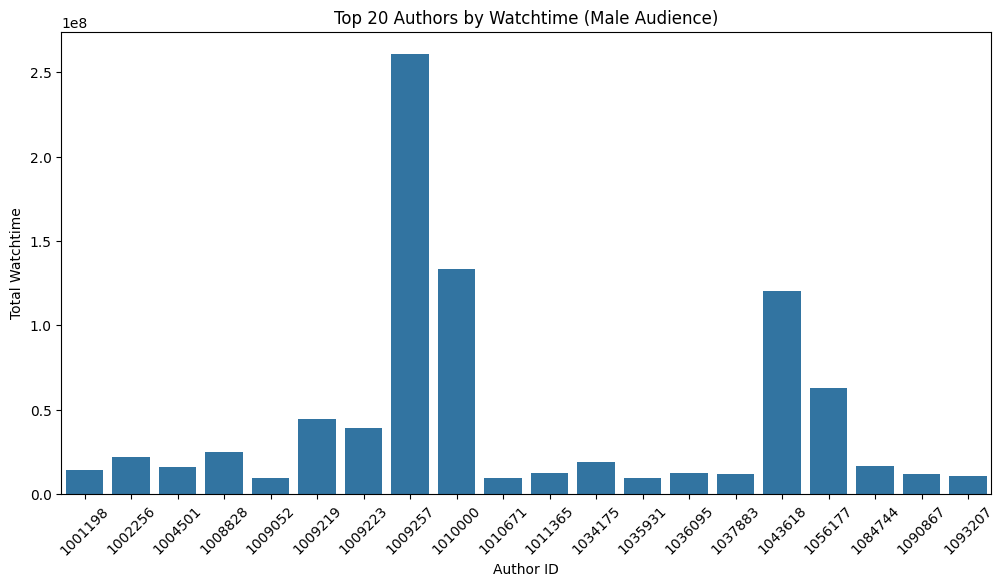

In [38]:
# Отфильтруем данные только по женскому полу ('male')
female_data = merged_data[merged_data['sex'] == 'male']

# Группировка данных по авторам и вычисление общего времени просмотра
top_female_authors = female_data.groupby('author_id')['total_watchtime'].sum().sort_values(ascending=False).head(20).reset_index()

# Построение графика для топ 20 авторов по времени просмотра у женщин
plt.figure(figsize=(12, 6))
sns.barplot(x='author_id', y='total_watchtime', data=top_female_authors)
plt.title('Top 20 Authors by Watchtime (Male Audience)')
plt.xticks(rotation=45)
plt.xlabel('Author ID')
plt.ylabel('Total Watchtime')
plt.show()

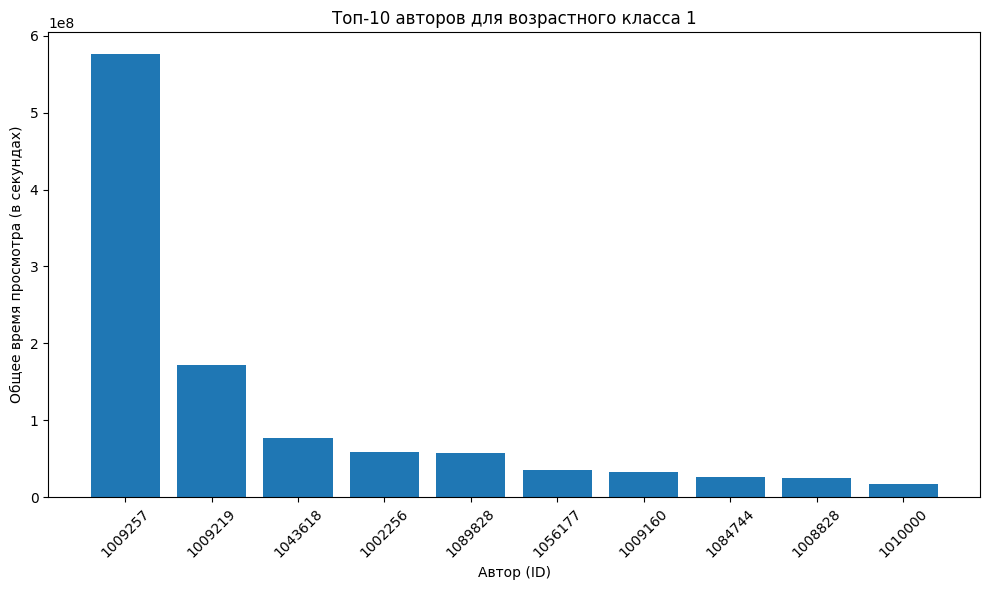

In [49]:
# Шаг 1: Загрузка данных
all_events = pd.read_csv('all_events.csv')
train_events = pd.read_csv('train_events.csv')
train_targets = pd.read_csv('train_targets.csv')
video_info = pd.read_csv('video_info_v2.csv')

# Шаг 2: Объединение данных
merged_data = train_events.merge(train_targets, on='viewer_uid')
merged_data = merged_data.merge(video_info, on='rutube_video_id')

# Шаг 3: Агрегация данных по авторам для возрастного класса 1
age_class_1_data = merged_data[merged_data['age_class'] == 1]
author_watchtime_age_class_1 = age_class_1_data.groupby('author_id')['total_watchtime'].sum().reset_index()

# Шаг 4: Определение топ-10 авторов
top_10_authors_age_class_1 = author_watchtime_age_class_1.nlargest(10, 'total_watchtime')

# Шаг 5: Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(top_10_authors_age_class_1['author_id'].astype(str), top_10_authors_age_class_1['total_watchtime'])
plt.title('Топ-10 авторов для возрастного класса 1')
plt.xlabel('Автор (ID)')
plt.ylabel('Общее время просмотра (в секундах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


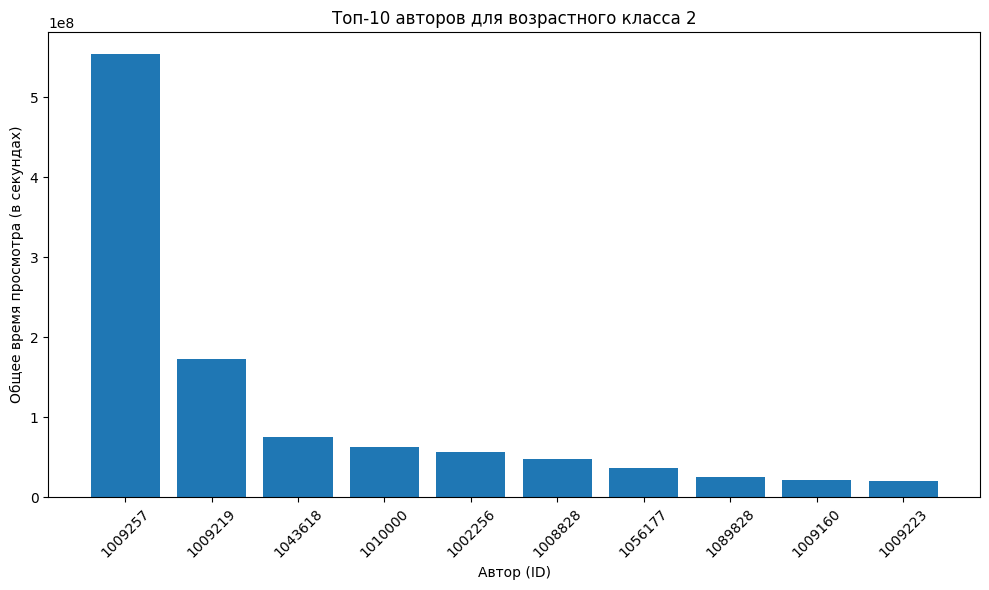

In [39]:
age_class_1_data = merged_data[merged_data['age_class'] == 2]
author_watchtime_age_class_1 = age_class_1_data.groupby('author_id')['total_watchtime'].sum().reset_index()

# Шаг 4: Определение топ-10 авторов
top_10_authors_age_class_1 = author_watchtime_age_class_1.nlargest(10, 'total_watchtime')

# Шаг 5: Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(top_10_authors_age_class_1['author_id'].astype(str), top_10_authors_age_class_1['total_watchtime'])
plt.title('Топ-10 авторов для возрастного класса 2')
plt.xlabel('Автор (ID)')
plt.ylabel('Общее время просмотра (в секундах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

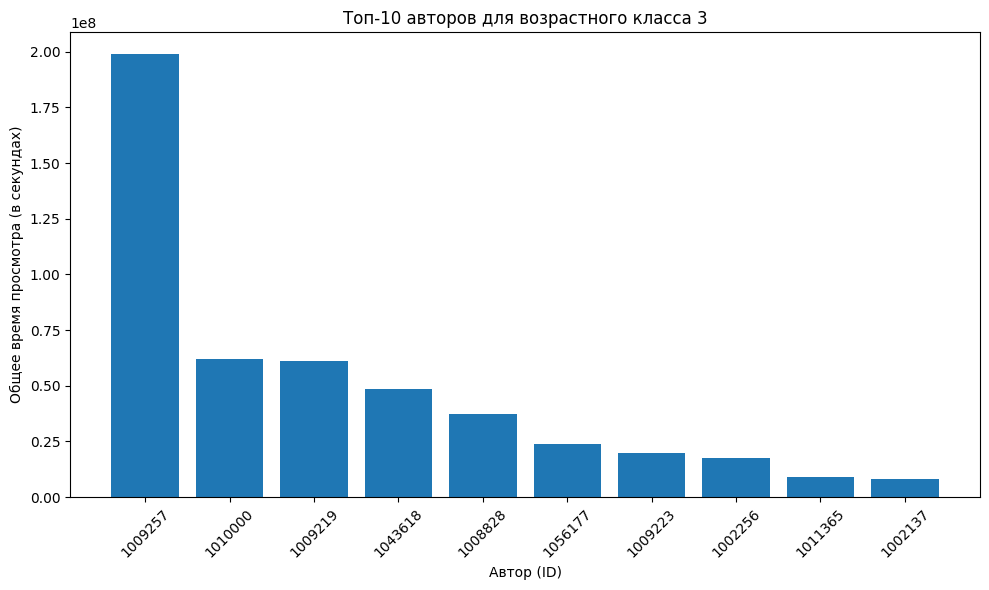

In [40]:
age_class_1_data = merged_data[merged_data['age_class'] == 3]
author_watchtime_age_class_1 = age_class_1_data.groupby('author_id')['total_watchtime'].sum().reset_index()

# Шаг 4: Определение топ-10 авторов
top_10_authors_age_class_1 = author_watchtime_age_class_1.nlargest(10, 'total_watchtime')

# Шаг 5: Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(top_10_authors_age_class_1['author_id'].astype(str), top_10_authors_age_class_1['total_watchtime'])
plt.title('Топ-10 авторов для возрастного класса 3')
plt.xlabel('Автор (ID)')
plt.ylabel('Общее время просмотра (в секундах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

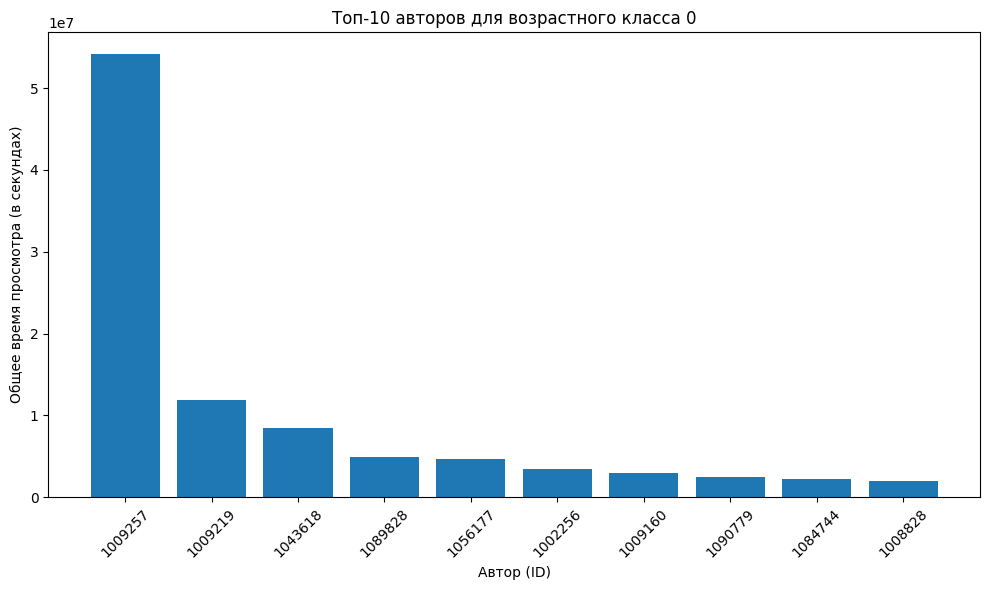

In [41]:
age_class_1_data = merged_data[merged_data['age_class'] == 0]
author_watchtime_age_class_1 = age_class_1_data.groupby('author_id')['total_watchtime'].sum().reset_index()

# Шаг 4: Определение топ-10 авторов
top_10_authors_age_class_1 = author_watchtime_age_class_1.nlargest(10, 'total_watchtime')

# Шаг 5: Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(top_10_authors_age_class_1['author_id'].astype(str), top_10_authors_age_class_1['total_watchtime'])
plt.title('Топ-10 авторов для возрастного класса 0')
plt.xlabel('Автор (ID)')
plt.ylabel('Общее время просмотра (в секундах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sex        female   male
age_class               
0            4832   2759
1           39235  23896
2           30850  34750
3           15181  28509


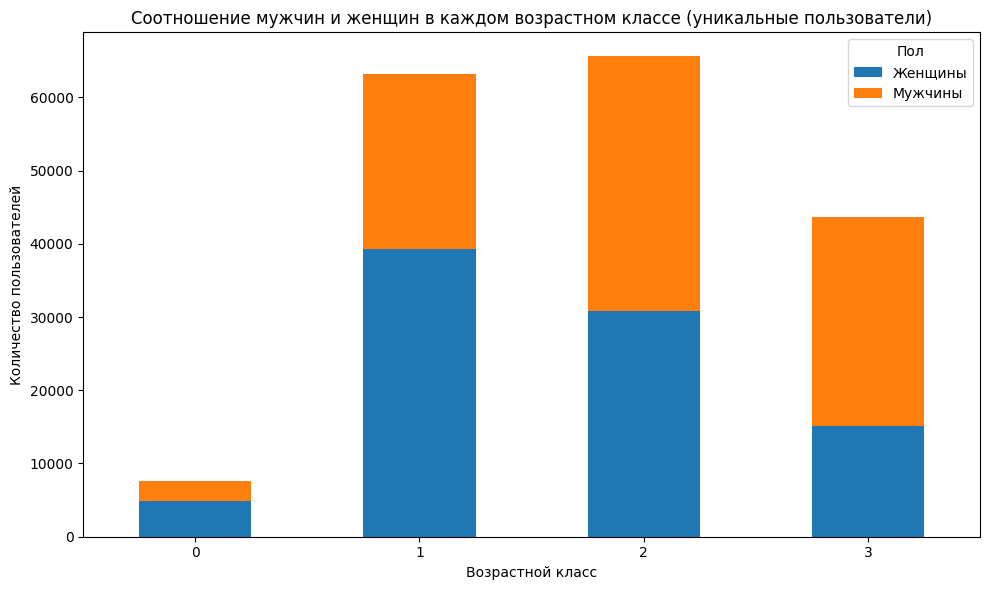

In [42]:
# Загрузка данных
train_targets = pd.read_csv('train_targets.csv')

# Удаление дубликатов пользователей (учет уникальных viewer_uid)
unique_users = train_targets.drop_duplicates(subset='viewer_uid')

# Группировка данных по возрастному классу и полу (с учетом уникальных пользователей)
gender_age_distribution = unique_users.groupby(['age_class', 'sex']).size().unstack()

# Вывод точного количества мужчин и женщин в каждом возрастном классе
print(gender_age_distribution)

# Построение графика
gender_age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Соотношение мужчин и женщин в каждом возрастном классе (уникальные пользователи)')
plt.xlabel('Возрастной класс')
plt.ylabel('Количество пользователей')
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.xticks(rotation=0)
plt.tight_layout()

# Показать график
plt.show()


In [55]:
unique_regions = all_events['region'].unique()

# Преобразование в список (опционально)
unique_regions_list = unique_regions.tolist()

# Вывод результатов
print("Уникальные значения поля 'region':")
print(unique_regions_list)
print(len(unique_regions_list))

Уникальные значения поля 'region':
['Tatarstan Republic', 'Bashkortostan Republic', 'Novosibirsk Oblast', 'Moscow', 'Moscow Oblast', 'Omsk Oblast', 'Chuvashia', 'Krasnoyarsk Krai', 'Chelyabinsk', 'Kamchatka', 'Nizhny Novgorod Oblast', 'Krasnodar Krai', 'Volgograd Oblast', 'Kaliningrad Oblast', 'Kuzbass', 'Stavropol Kray', 'Samara Oblast', 'Amur Oblast', 'Sverdlovsk Oblast', 'St.-Petersburg', 'Yamalo-Nenets', 'Orenburg Oblast', 'Khanty-Mansia', 'Kaluga Oblast', 'Tomsk Oblast', 'Novgorod Oblast', 'Arkhangelskaya', 'North Ossetia–Alania', 'Kursk Oblast', "Leningradskaya Oblast'", 'Krasnoyarskiy', 'Ivanovo Oblast', 'Altay Kray', 'Kurgan Oblast', 'Kostroma Oblast', 'Bryansk Oblast', 'Dagestan', 'Lipetsk Oblast', 'Vladimir Oblast', 'Kirov Oblast', 'Khabarovsk', 'Tambov Oblast', 'Chukotka', 'Voronezh Oblast', 'Sverdlovsk', 'Tula Oblast', 'Krasnodarskiy', 'Irkutsk Oblast', 'Saratov Oblast', 'Khakasiya Republic', 'Penza', 'Perm Krai', 'Oryol oblast', 'Vladimir', 'Smolensk Oblast', 'Penza Oblast